In [18]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, ConfusionMatrixDisplay

In [2]:
indoor_train_path = 'museum_train/indoor/'
outdoor_train_path = 'museum_train/outdoor/'

In [3]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        img = img.resize((224, 224))  # Resize images to a common size
        img = img.convert('L')  # Convert to grayscale (optional)
        img = np.array(img).flatten()  # Flatten the image to 1D array
        img = img/255
        images.append(img)
        labels.append(label)
    return images, labels

In [4]:
indoor_train_images, indoor_train_labels = load_images_from_folder(indoor_train_path, label=0)
outdoor_train_images, outdoor_train_labels = load_images_from_folder(outdoor_train_path, label=1)

In [5]:
X = np.array(indoor_train_images + outdoor_train_images)
y = np.array(indoor_train_labels + outdoor_train_labels)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_jobs=20, n_estimators=200,verbose=1,random_state=42)
model.fit(X_train,y_train)

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:   29.6s


Accuracy: 77.45%
Precision: 78.66%
Recall: 74.60%
F1 Score: 76.57%


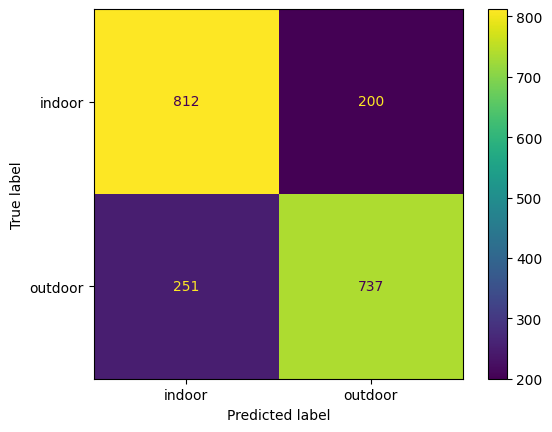

In [19]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1_score = f1_score(y_test,y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1_score * 100:.2f}%')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['indoor','outdoor'])

In [21]:
import pickle

model_pkl_file = "museum_model_randomforest.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

In [22]:
def load_single_images(image):
    img = Image.open(image)
    img = img.resize((224, 224))  
    img = img.convert('L')  
    img = np.array(img).flatten()  
    img = img/255
    return img

In [24]:
my_img = load_single_images('00000023.jpg')

In [26]:
model.predict(my_img.reshape(1,-1))

array([0])